In [ ]:
import os #to access os based functionality
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv


# # **IMPORTING LIBRARIES**

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns #visualization
from matplotlib import style
from sklearn.impute import SimpleImputer #used to handle missing values in a dataset.
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

style.use("fivethirtyeight") # to set the style of plots.

# # **DATA COLLECTION**

In [ ]:
df=pd.read_csv('/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv')

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# # **DATA PROCESSING**

In [ ]:
print(df.isnull().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


# *HANDLING MISSING VALUES*

In [ ]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


# # **FEATURE SELECTION**

In [ ]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

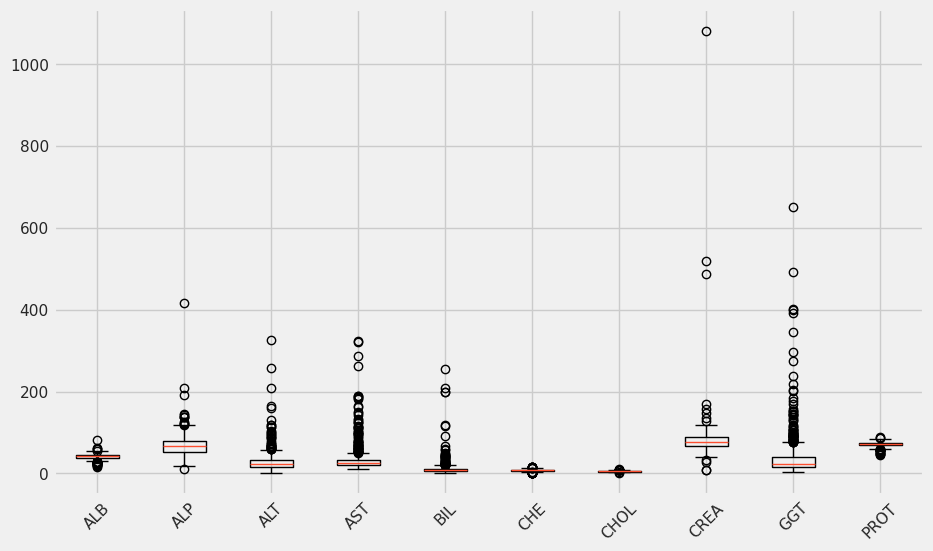

In [ ]:
import matplotlib.pyplot as plt


columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


plt.figure(figsize=(10,6))#line sets the figure size to be 10 inches wide and 6 inches tall.
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)#df[columns_to_plot].values selects the specific columns from the DataFrame.
#The labels=columns_to_plot parameter assigns labels to each box in the boxplot based on the column names.
plt.xticks(rotation=45)#rotates the x-axis labels by 45 degrees for better readability
plt.show()

# *REMOVING OUTLIERS*

In [ ]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)
# These percentiles are used to define the lower and upper thresholds for identifying outliers.
df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
#Next, df_outliers selects the rows in the DataFrame df where the column col falls outside the defined thresholds. It filters out the data points that are below q_low or above q_hi.
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [ ]:
from sklearn.preprocessing import RobustScaler


robust_scaler = RobustScaler()

cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])

In [ ]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


# **PLOTTING GRAPHS**

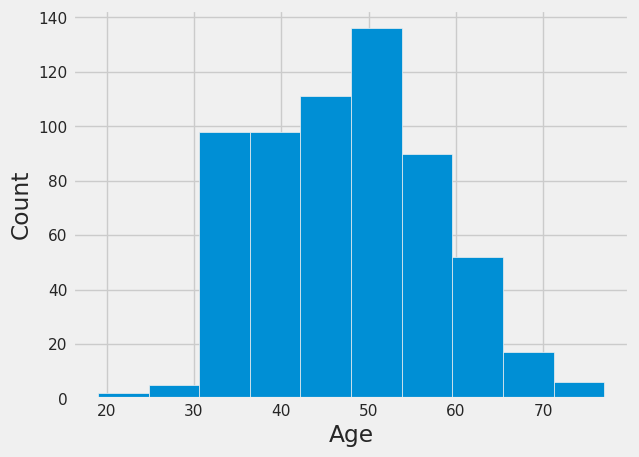

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

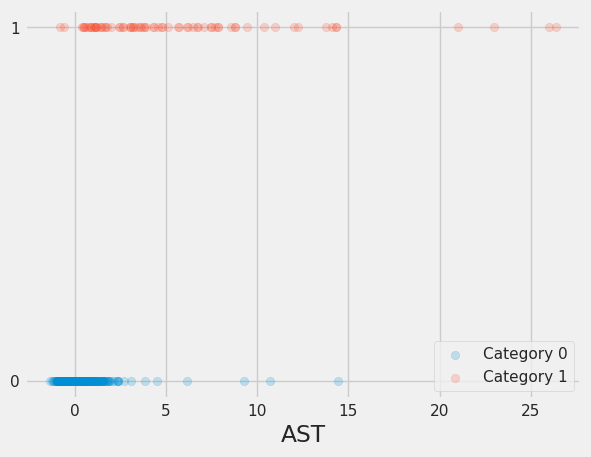

In [ ]:
df_cat0 = df[df['Category']==0]
df_cat1 = df[df['Category']==1]

plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Category 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Category 1')
# The alpha=0.2 parameter sets the transparency of the points, making them more visually distinguishable.
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()# It helps to identify and distinguish different data series or categories within a graph.
plt.show()

Total Suspected Patients : 540 
Total Healthy Patients : 75 


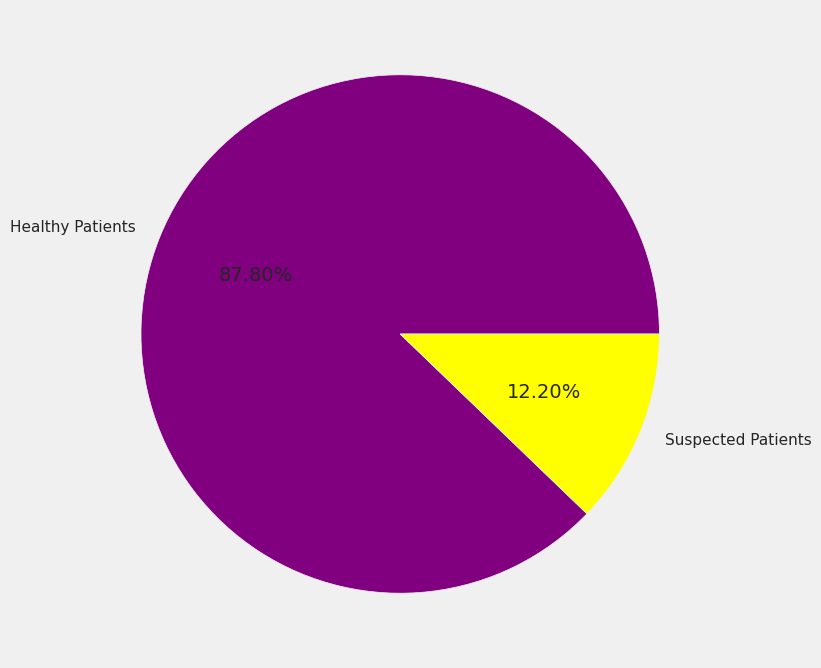

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["purple","yellow"],
        labels=["Healthy Patients","Suspected Patients"],
        autopct="%1.2f%%",
        )

plt.show()

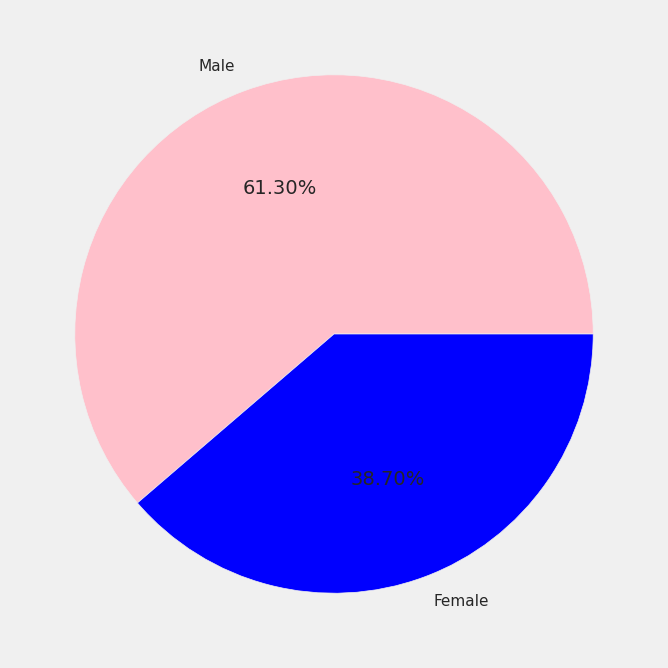

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["pink","blue"],
        labels=["Male","Female"],
        autopct="%1.2f%%",
        )
plt.show()

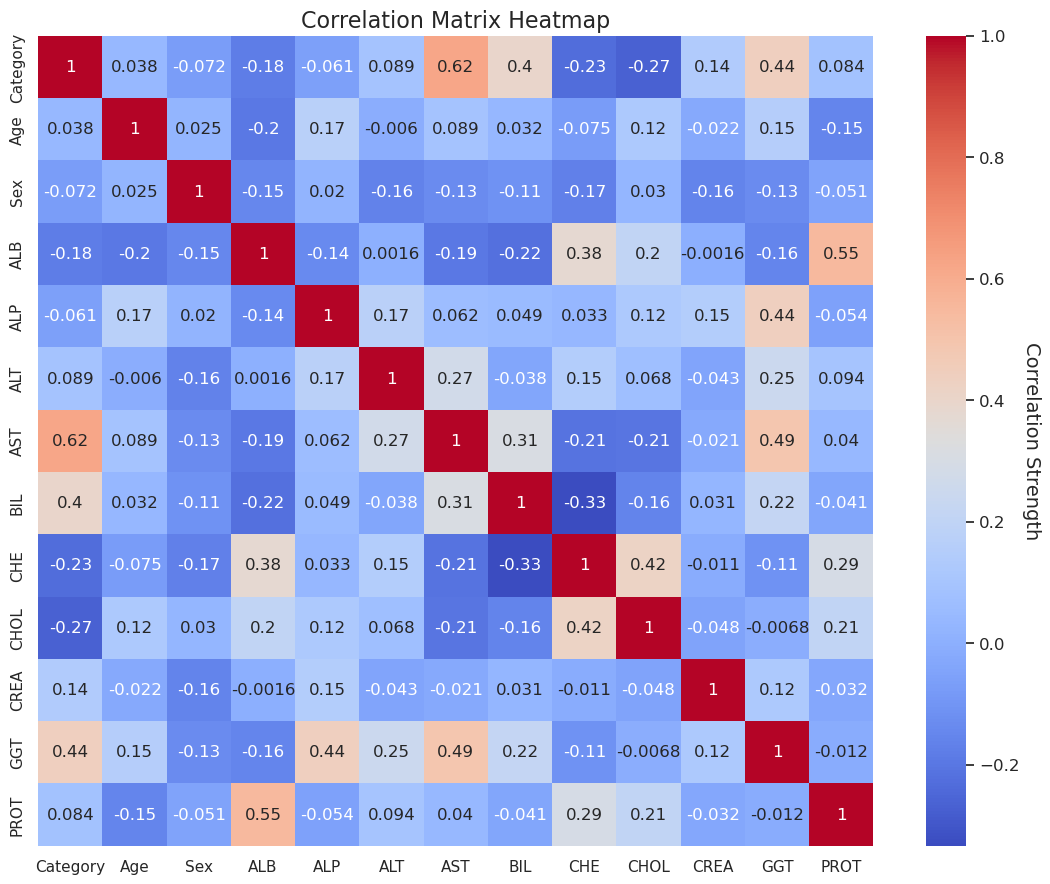

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
correlation_matrix = df.corr()# calculates the correlation between all columns of the DataFrame.
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()

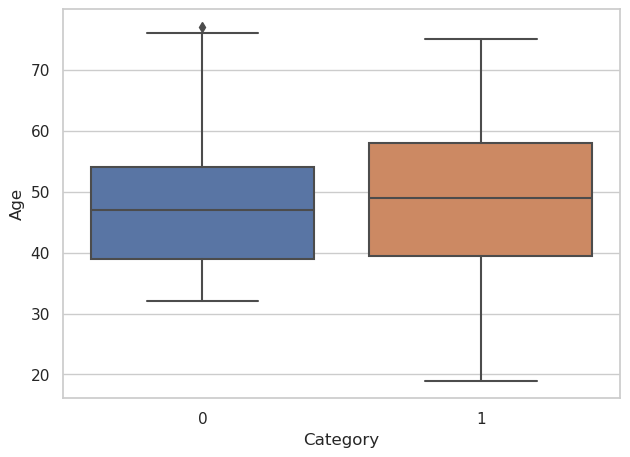

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Category", y="Age", data=df)
plt.show()

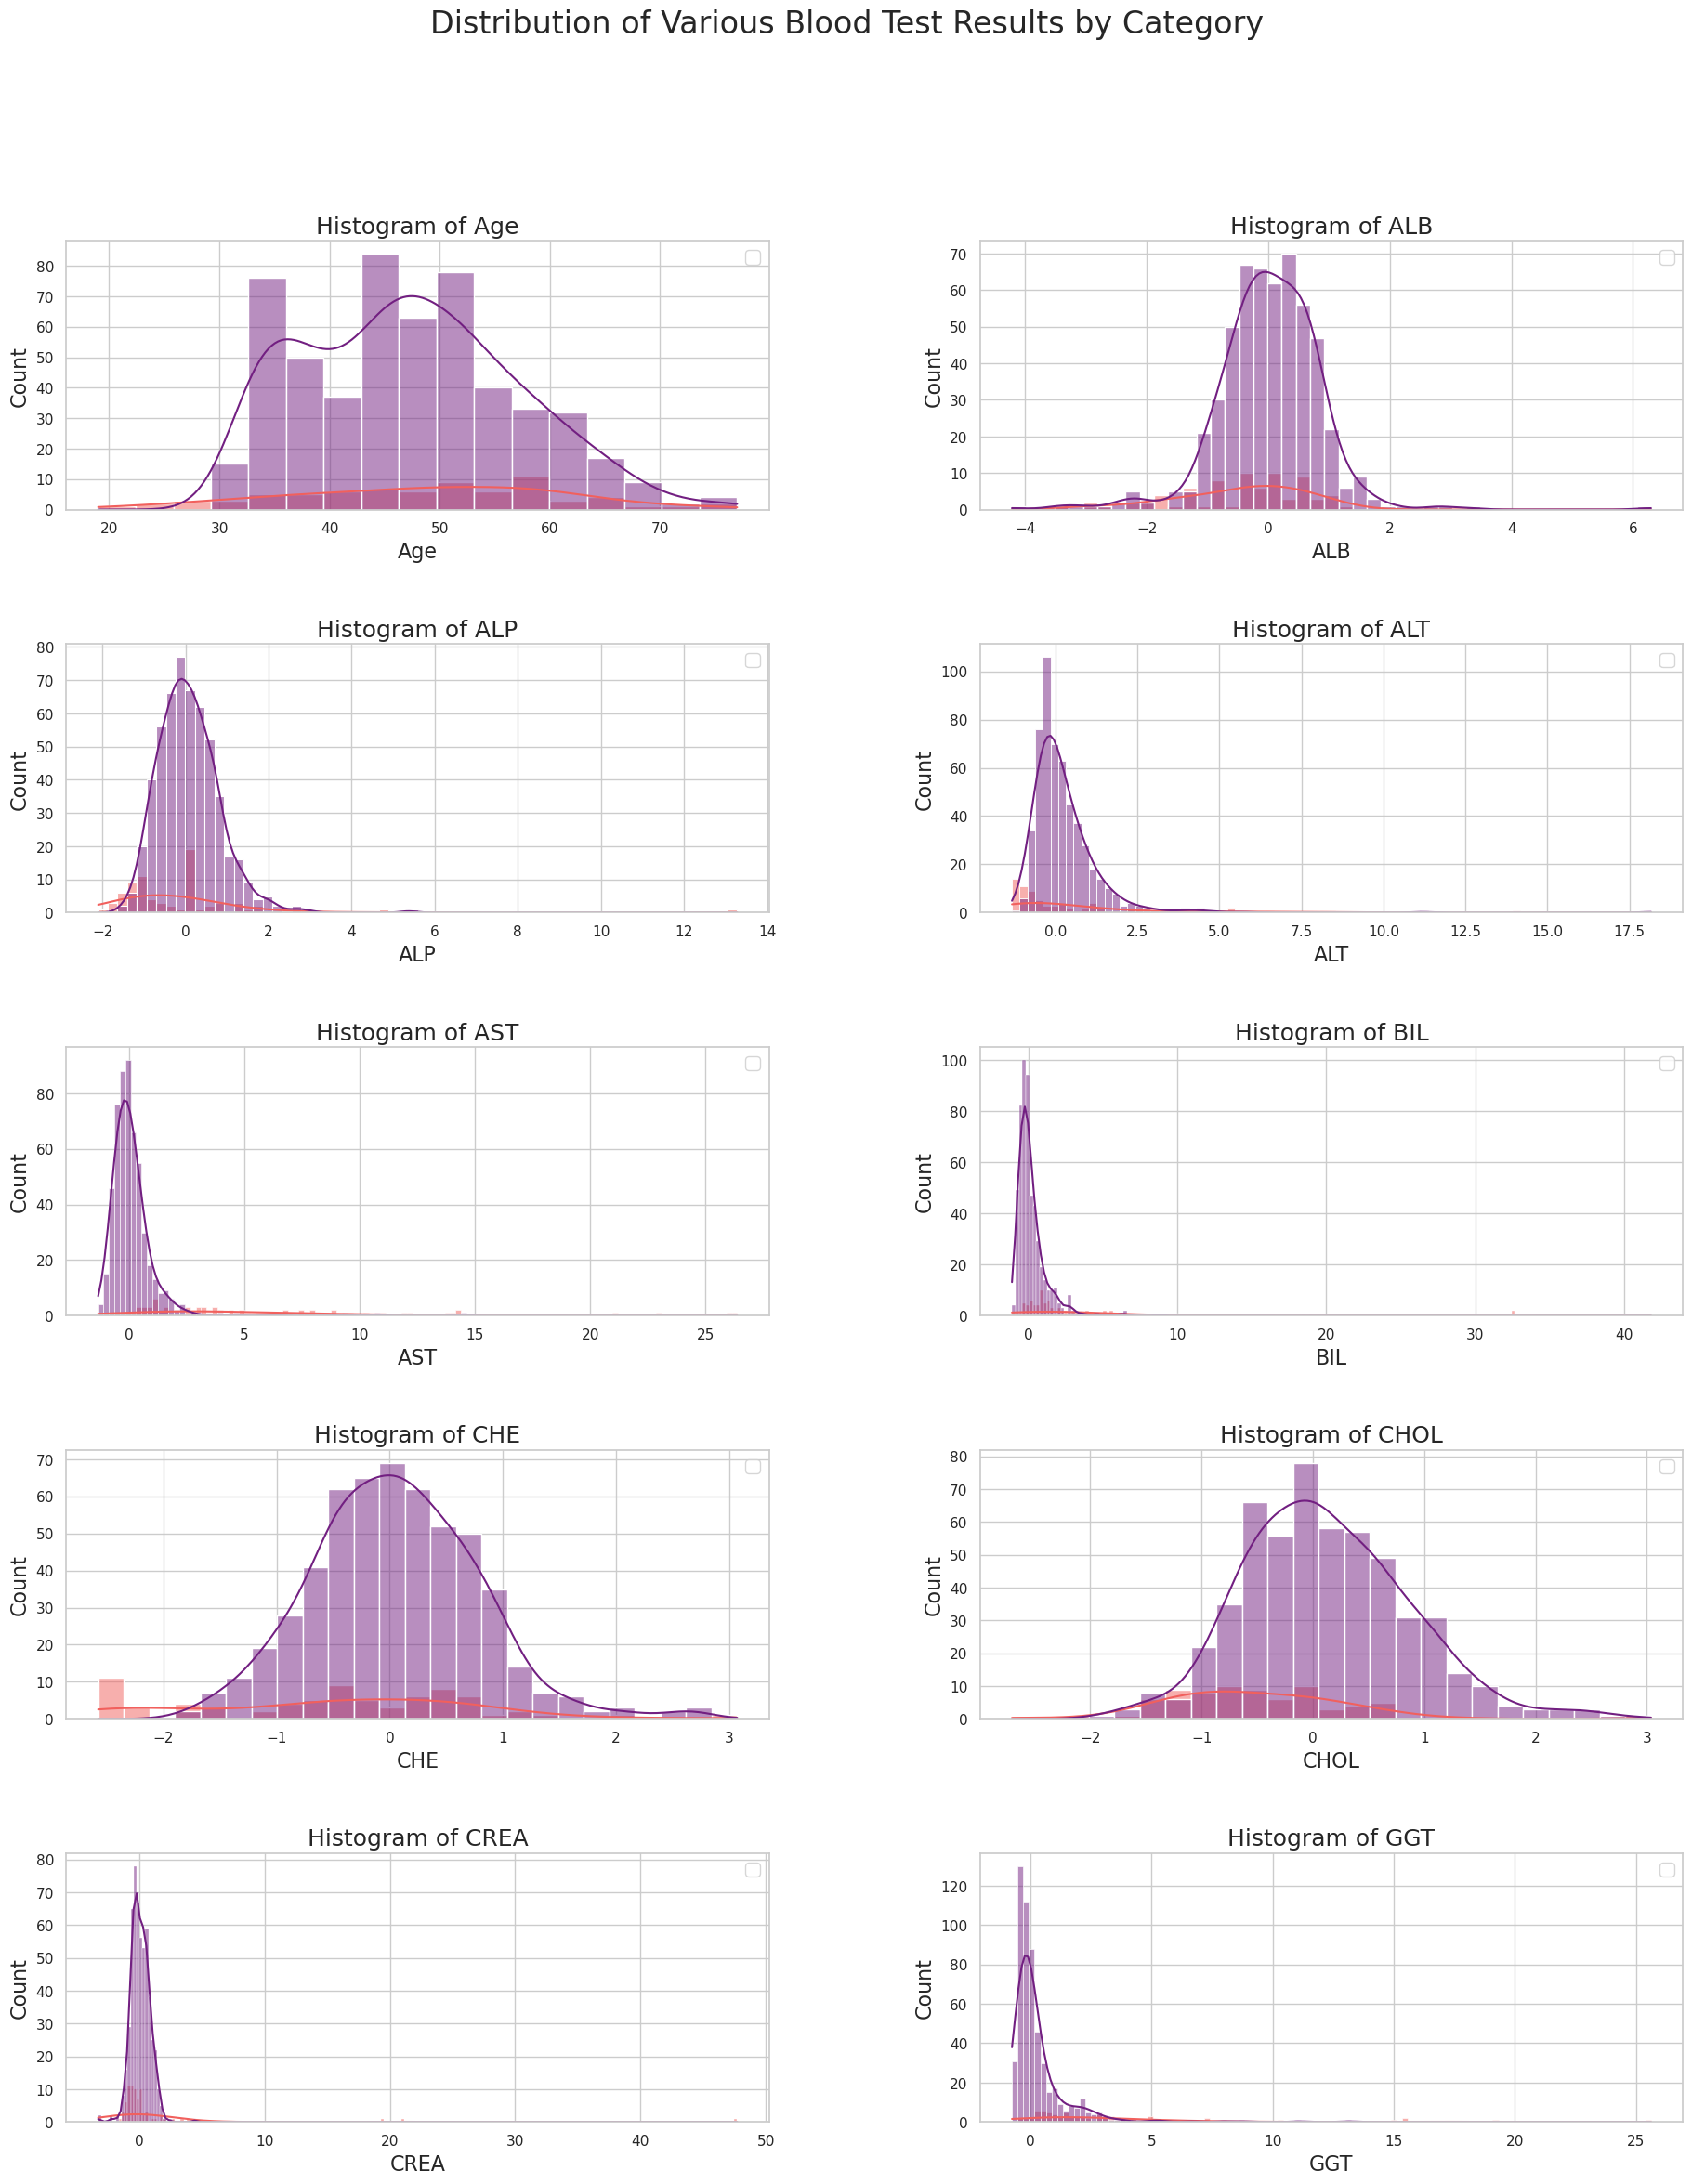

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots


# **#MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,-0.531250,-0.538899,-0.918919,-0.336283,0.033898,-0.500942,-1.449477,1.380952,-0.457143,-0.524590
1,32,0,-0.531250,0.136622,-0.300300,-0.106195,-0.576271,1.096045,-0.355401,-0.142857,-0.314286,0.704918
2,32,0,0.781250,0.303605,0.792793,2.362832,-0.203390,0.218456,-0.076655,0.428571,0.404082,1.163934
3,32,0,0.203125,-0.557875,0.456456,-0.292035,1.966102,-0.350282,-0.397213,0.142857,0.428571,0.573770
4,32,0,-0.421875,0.280835,0.576577,-0.097345,0.389831,0.335217,-0.689895,-0.047619,0.269388,-0.573770
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,-1.546875,13.278937,-1.027027,7.469027,7.237288,-1.013183,0.689895,-1.014286,25.616327,-0.606557
611,64,1,-2.796875,1.370019,-1.207207,1.637168,2.152542,-2.531073,-1.595819,-0.666667,0.514286,-0.147541
612,64,1,-2.015625,0.781784,-1.171171,6.469027,6.898305,-2.485876,-1.170732,-0.490476,1.669388,1.606557
613,46,1,-1.390625,0.060111,0.960961,3.194690,2.152542,-1.770245,-0.773519,-1.190476,1.089796,-0.196721


Accuracy: 0.8861788617886179
Training set score: 0.98
Test set score: 0.89


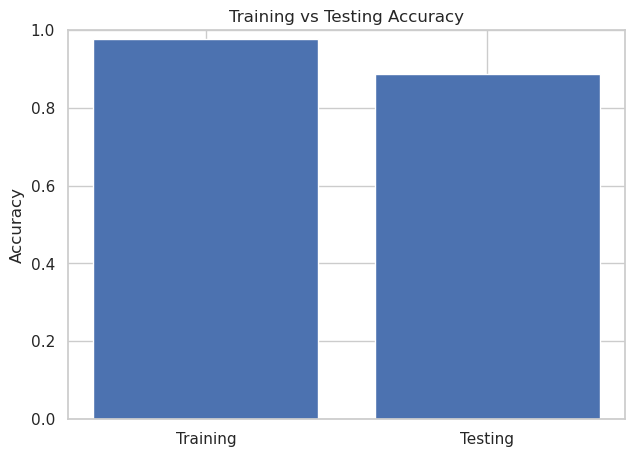

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy scores for training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Plot the graph
x = ['Training', 'Testing']
y = [train_accuracy, test_accuracy]

plt.bar(x, y)
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()


# **#MODEL EVALUATION**

Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Training set score: 0.98
Test set score: 0.90
Accuracy: 0.90


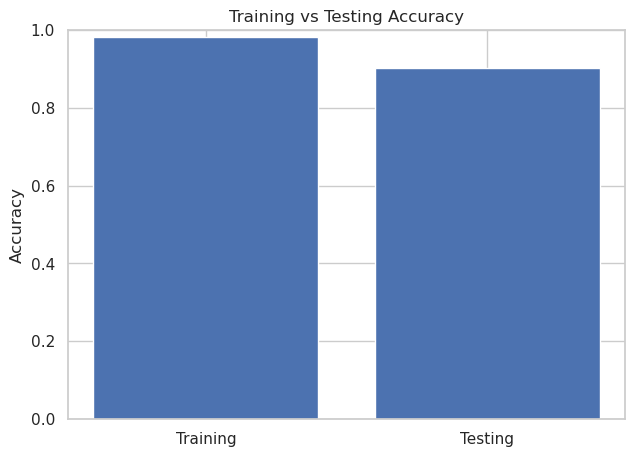

In [ ]:
import warnings
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Define the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to search over
hyperparameters = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 1, 10],
    "max_iter": [500]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, hyperparameters, scoring="accuracy", cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the target variable for the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print("Training set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Accuracy: {:.2f}".format(accuracy))

# Calculate accuracy scores for training and testing sets
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Plot the graph
x = ['Training', 'Testing']
y = [train_accuracy, test_accuracy]
plt.bar(x, y)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()
